In [67]:
import pprint
from datetime import datetime
import pandas as pd
import numpy as np
import twittools
from matplotlib import pyplot as plt
from collections import Counter
import re
import copy
import seaborn as sns
from pandas.tseries.offsets import MonthEnd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import networkx as nx

Nous chargeons la base de données originale qui a été précédemment sauvegardée dans un fichier `.csv`.
Nous transformons la colonne `day_day` d'une chaîne de caractères en objets `datetime`. Cela permet à l'algorithme de comprendre qu'il s'agit de dates, il devient donc possible d'effectuer des opérations liées au temps sur cette colonne comme l'ajout ou la soustraction d'un mois sans avoir à faire les calculs automatiquement.


In [68]:
df = twittools.pd_open_csv('oran_22_populated.csv', index_col='Unnamed: 0')
df['day_day'] = pd.to_datetime(df['day_day'], format="%Y-%m-%d")
df

username                                            content  \
0      liverpooldzz   flash - lors de la ceremonie des jeux mediter...   
1       APS_Algerie  championnat arabe de " " (3e journee) : deux m...   
2     soir_officiel  championnat arabe de natation : lalgerie decro...   
3     hakimmkireche  tout ce travail magique au final une etat qui ...   
4          SyfaxArk  le recap de trip in est juste magnifique  http...   
...             ...                                                ...   
2470       COJM2022  travaux de la 9eme reunion en teletravail entr...   
2471   cijmmedgames  43 sites sportifs aux jeux mediterraneens dora...   
2472       COJM2022  reunion en teletravail presidee par le directe...   
2473   cijmmedgames  nouveau stade doran : le premier ministre d al...   
2474   cijmmedgames  addadi: ce report permettra a lensemble du mou...   

                                         c_bag_of_words  \
0     flash lors ceremonie jeu mediterraneen public ...   
1     championnat arabe ( journee deux medaille dor ...   
2     championnat arabe natation lalgerie decroche t...   
3     travail magique final etat pousse arriere merc...   
4     recap trip in juste magnifique https://t.co/nm...   
...                                                 ...   
2470  travail 9em reunion teletravail entre commissi...   
2471  43 site sportif jeu mediterraneen doran https:...   
2472  reunion teletravail presidee directeur general...   
2473  nouveau stade doran premier ministre algerie a...   
2474  addadi report permettre avoir lensemble mouvem...   

                           date             tweet_id  \
0     2022-08-17 22:21:51+00:00  1560029164165636101   
1     2022-07-23 10:01:26+00:00  1550783138003140609   
2     2022-07-21 12:53:17+00:00  1550101607119036416   
3     2022-07-19 15:32:57+00:00  1549417012635619331   
4     2022-07-18 21:41:12+00:00  1549147299800129536   
...                         ...                  ...   
2470  2020-06-11 14:29:49+00:00  1271087244024127488   
2471  2020-06-10 16:24:57+00:00  1270753830846836737   
2472  2020-06-04 23:08:58+00:00  1268681179680604162   
2473  2020-05-20 12:52:37+00:00  1263090249468653568   
2474  2020-04-01 16:35:01+00:00  1245389215208222720   

                                               outlinks  n_links  \
0                                                   NaN        0   
1     https://www.aps.dz/sport/143124-championnat-ar...        1   
2        https://www.lesoirdalgerie.com/s@c6zam9fr85494        1   
3                                                   NaN        0   
4                                                   NaN        0   
...                                                 ...      ...   
2470                                                NaN        0   
2471  https://cijm.org.gr/43-sites-sportifs-aux-jeux...        1   
2472                                                NaN        0   
2473  https://cijm.org.gr/nouveau-stade-doran-le-pre...        1   
2474  https://cijm.org.gr/addadi-ce-report-permettra...        1   

                                                    url  n_likes  n_quotes  \
0     https://twitter.com/liverpooldzz/status/156002...        0         0   
1     https://twitter.com/APS_Algerie/status/1550783...       27         0   
2     https://twitter.com/soir_officiel/status/15501...        0         0   
3     https://twitter.com/hakimmkireche/status/15494...        1         0   
4     https://twitter.com/SyfaxArk/status/1549147299...        0         0   
...                                                 ...      ...       ...   
2470  https://twitter.com/COJM2022/status/1271087244...        3         0   
2471  https://twitter.com/cijmmedgames/status/127075...        7         0   
2472  https://twitter.com/COJM2022/status/1268681179...        2         0   
2473  https://twitter.com/cijmmedgames/status/126309...        8         0   
2474  https://twitter.com/cijmmedgames/status/124538...        3 

L'exécution de `df.info()` donne le type de données pour chaque colonne, ci-dessous une brève description des types de données :
* `object` : qui fait référence à une `chaîne` de caractères, c'est-à-dire du texte.
* `int64` : qui se réfère à des nombres entiers et peut stocker un nombre de valeur maximale de `9,223,372,036,854,775,807`.
* `float64` : qui fait référence à tous les nombres réels, par exemple, `3.14`.
* `datetime64[ns]` : qui se réfère aux dates exprimées dans le calendrier grégorien actuel, indéfiniment étendu à la fois dans le futur et dans le passé.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   username        2475 non-null   object        
 1   content         2475 non-null   object        
 2   c_bag_of_words  2475 non-null   object        
 3   date            2475 non-null   object        
 4   tweet_id        2475 non-null   int64         
 5   outlinks        288 non-null    object        
 6   n_links         2475 non-null   int64         
 7   url             2475 non-null   object        
 8   n_likes         2475 non-null   int64         
 9   n_quotes        2475 non-null   int64         
 10  language        2475 non-null   object        
 11  replies         2475 non-null   int64         
 12  tweet_quotes    426 non-null    object        
 13  tweet_likers    630 non-null    object        
 14  count           2475 non-null   int64         
 15  quot

Après avoir importé l'ensemble de données original, nous souhaitons effectuer trois analyses :
1. Analyse des séries temporelles de l'occurrence des clusters sur l'ensemble de la période où le `#oran2022` a été mentionné.
2. Une analyse des nuages de mots pour chaque cluster.
3. Une analyse de réseau selon la théorie des graphes.
Deux de ces analyses sont liées au temps, donc nous devons d'abord comprendre les limites temporelles de nos données. Puisque nous avons converti la colonne `day_day` en un objet `datetime64`, nous pouvons maintenant effectuer quelques opérations sur celle-ci pour répondre à certaines questions :
    
    A. Quand le hashtag `#oran2022` a-t-il été utilisé pour la première fois ?
    
    B. Quand a-t-il été utilisé pour la dernière fois ? 

Selon les résultats du bloc de code ci-dessous, la première instance de `#oran2022` a été enregistrée deux ans auparavant, le 4 avril 2020 ; elle a été utilisée pour la dernière fois le 8 août 2022. Nous disposons de deux ans et quatre mois de données historiques. 

In [6]:
print(df['day_day'].min())
print(df['day_day'].max())

2020-04-01 00:00:00
2022-08-17 00:00:00


Le problème de notre base de données originale est qu'elle ne contient que les dates où le hashtag `#oran2022` a été utilisé. Les jours pendant lesquels le hashtag n'a pas été utilisé n'ont pas été enregistrés. En d'autres termes, les dates que nous avons dans l'ensemble de données original ne sont pas continues.

Un deuxième problème est la redondance. Si le hashtag `#oran2022` a été utilisé plus d'une fois dans une journée, la date est présente autant de fois, par exemple, si `#oran2022` a été mentionné dans un tweet deux fois le 1er septembre 2021, l'ensemble de données contiendra deux lignes de la même date `2021-09-01`.

Afin de résoudre ces problèmes, nous devons consolider nos données. Pour des raisons pratiques, nous choisissons de consolider nos données en une série chronologique mensuelle, c'est-à-dire en créant un tableau contenant des lignes où chaque ligne représente un mois sur la période allant d'avril 2020 à août 2022.

Chaque rangée contiendrait le nombre de tweets publiés au cours de ce mois, étant donné que chaque rangée fait référence à un mois. Le tableau contient également le nombre de likes enregistrés pendant ce mois sur les tweets contenant le hashtag `#oran2022`, le nombre de citations et le nombre de clusters présents sur un mois donné, voir le bloc de code ci-dessous :

In [49]:
date_range = pd.date_range('2020-04-01', periods=29, freq='M')
df_time = pd.DataFrame({
    'date': date_range,
    'n_tweets':np.zeros(29),
    'n_likes':np.zeros(29),
    'n_quotes':np.zeros(29),
    'period':np.zeros(29),
    'cluster_0':np.zeros(29),
    'cluster_1':np.zeros(29),
    'cluster_2':np.zeros(29),
    'cluster_3':np.zeros(29),
    })

df_time.drop('period', axis=1, inplace=True)
df_time

date  n_tweets  n_likes  n_quotes  cluster_0  cluster_1  cluster_2  \
0  2020-04-30       0.0      0.0       0.0        0.0        0.0        0.0   
1  2020-05-31       0.0      0.0       0.0        0.0        0.0        0.0   
2  2020-06-30       0.0      0.0       0.0        0.0        0.0        0.0   
3  2020-07-31       0.0      0.0       0.0        0.0        0.0        0.0   
4  2020-08-31       0.0      0.0       0.0        0.0        0.0        0.0   
5  2020-09-30       0.0      0.0       0.0        0.0        0.0        0.0   
6  2020-10-31       0.0      0.0       0.0        0.0        0.0        0.0   
7  2020-11-30       0.0      0.0       0.0        0.0        0.0        0.0   
8  2020-12-31       0.0      0.0       0.0        0.0        0.0        0.0   
9  2021-01-31       0.0      0.0       0.0        0.0        0.0        0.0   
10 2021-02-28       0.0      0.0       0.0        0.0        0.0        0.0   
11 2021-03-31       0.0      0.0       0.0        0.0        0.0        0.0   
12 2021-04-30       0.0      0.0       0.0        0.0        0.0        0.0   
13 2021-05-31       0.0      0.0       0.0        0.0        0.0        0.0   
14 2021-06-30       0.0      0.0       0.0        0.0        0.0        0.0   
15 2021-07-31       0.0      0.0       0.0        0.0        0.0        0.0   
16 2021-08-31       0.0      0.0       0.0        0.0        0.0        0.0   
17 2021-09-30       0.0      0.0       0.0        0.0        0.0        0.0   
18 2021-10-31       0.0      0.0       0.0        0.0        0.0        0.0   
19 2021-11-30       0.0      0.0       0.0        0.0        0.0        0.0   
20 2021-12-31       0.0      0.0       0.0        0.0        0.0        0.0   
21 2022-01-31       0.0      0.0       0.0        0.0        0.0        0.0   
22 2022-02-28       0.0      0.0       0.0        0.0        0.0        0.0   
23 2022-03-31       0.0      0.0       0.0        0.0        0.0        0.0   
24 2022-04-30       0.0      0.0       0.0        0.0        0.0        0.0   
25 2022-05-31       0.0      0.0       0.0        0.0        0.0        0.0   
26 2022-06-30       0.0      0.0       0.0        0.0        0.0        0.0   
27 2022-07-31       0.0      0.0       0.0        0.0        0.0        0.0   
28 2022-08-31       0.0      0.0       0.0        0.0        0.0        0.0   

    cluster_3  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0  
10        0.0  
11        0.0  
12        0.0  
13        0.0  
14        0.0  
15        0.0  
16        0.0  
17        0.0  
18        0.0  
19        0.0  
20        0.0  
21        0.0  
22        0.0  
23        0.0  
24        0.0  
25        0.0  
26        0.0  
27        0.0  
28        0.0

Après avoir créé une table vide dans laquelle nous allons consolider nos données, nous vérifions les types de données pour chaque colonne, en nous référant à la description précédente des types de données fournie ci-dessus. 
A l'exception de la colonne `date` qui est de type `datetime64`, le reste de nos données sont quantitatives.

Après avoir rempli notre tableau avec les données de l'ensemble de données original, dont nous avons maintenant une version consolidée, nous vérifions le nombre de tweets appartenant à chaque cluster, par exemple, le cluster 1 contient 1899 tweets.

In [65]:
print(df_time.dtypes)
print(df['cluster'].value_counts())

date          object
n_tweets     float64
n_likes      float64
n_quotes     float64
cluster_0    float64
cluster_1    float64
cluster_2    float64
cluster_3    float64
dtype: object
1    1899
2     428
3      80
0      68
Name: cluster, dtype: int64


Voici l'algorithme appliqué pour remplir le tableau consolidé. Et dans l'output, la table consolidée après avoir été remplie.

In [65]:
# function that parses a dictionary of data from a source df
# populates the target_df at the specified date
def update_df_time(target_df, source_dict):
    date_ = source_dict['date']
    row_data = [source_dict['n_tweets'], source_dict['n_likes'], source_dict['n_quotes'], source_dict['cluster_0'], source_dict['cluster_1'], source_dict['cluster_2'], source_dict['cluster_3']]
    df_time.loc[df_time['date'] == date_, 'n_tweets':] += row_data
    



# a function to extract data from the main data frame, i.e., source_df
# and populate a consolidated version of it, i.e., target_df
def popul_time_series(source_df, target_df):

    # parsing each row of source_df
    for i, row in source_df.iterrows():
        # convert row to dictionary
        row_dict = dict(row)
        # compact version of the dictionary containing strictly necessary data
        row_dict_c = {
            'date': row['day_day'] + MonthEnd(0),
            'n_tweets': 1,
            'n_likes': row['n_likes'],
            'n_quotes': row['n_quotes'],
            'cluster_0': 1 if row['cluster'] == 0 else 0,
            'cluster_1': 1 if row['cluster'] == 1 else 0,
            'cluster_2': 1 if row['cluster'] == 2 else 0,
            'cluster_3': 1 if row['cluster'] == 3 else 0
            }
        update_df_time(target_df, row_dict_c)


# popul_time_series(df, df_time)
# df_time


date  n_tweets  n_likes  n_quotes  cluster_0  cluster_1  cluster_2  \
0  2020-04-30       1.0      3.0       0.0        0.0        0.0        1.0   
1  2020-05-31       1.0      8.0       0.0        0.0        1.0        0.0   
2  2020-06-30       6.0     35.0       0.0        0.0        3.0        3.0   
3  2020-07-31       3.0     26.0       0.0        0.0        2.0        1.0   
4  2020-08-31       1.0      2.0       0.0        0.0        1.0        0.0   
5  2020-09-30       0.0      0.0       0.0        0.0        0.0        0.0   
6  2020-10-31       0.0      0.0       0.0        0.0        0.0        0.0   
7  2020-11-30       1.0      4.0       0.0        0.0        0.0        1.0   
8  2020-12-31       1.0      3.0       0.0        0.0        0.0        1.0   
9  2021-01-31       2.0      4.0       0.0        0.0        1.0        1.0   
10 2021-02-28       2.0      6.0       0.0        0.0        1.0        1.0   
11 2021-03-31       2.0      5.0       0.0        0.0        1.0        1.0   
12 2021-04-30       5.0     30.0       1.0        0.0        2.0        3.0   
13 2021-05-31       3.0     13.0       0.0        0.0        1.0        2.0   
14 2021-06-30      13.0     33.0       2.0        0.0        9.0        4.0   
15 2021-07-31       2.0      8.0       0.0        0.0        0.0        2.0   
16 2021-08-31       1.0      0.0       0.0        0.0        0.0        1.0   
17 2021-09-30       3.0     17.0       0.0        0.0        2.0        1.0   
18 2021-10-31       7.0     65.0       0.0        0.0        6.0        1.0   
19 2021-11-30       6.0     24.0       0.0        0.0        4.0        2.0   
20 2021-12-31       6.0    139.0       6.0        0.0        4.0        2.0   
21 2022-01-31       5.0     11.0       1.0        0.0        5.0        0.0   
22 2022-02-28      13.0     91.0       1.0        0.0       10.0        3.0   
23 2022-03-31       9.0    102.0       0.0        0.0        6.0        3.0   
24 2022-04-30      36.0    500.0      12.0        0.0       14.0       22.0   
25 2022-05-31     134.0   3285.0     251.0        0.0       94.0       40.0   
26 2022-06-30    1627.0  40796.0    1104.0       30.0     1315.0      248.0   
27 2022-07-31     599.0  15841.0     396.0       38.0      430.0       85.0   
28 2022-08-31       2.0      0.0       0.0        0.0        0.0        2.0   

    cluster_3  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0  
10        0.0  
11        0.0  
12        0.0  
13        0.0  
14        0.0  
15        0.0  
16        0.0  
17        0.0  
18        0.0  
19        0.0  
20        0.0  
21        0.0  
22        0.0  
23        0.0  
24        0.0  
25        0.0  
26       34.0  
27       46.0  
28        0.0

Après avoir rempli la table, nous la sauvegardons dans un fichier séparé `.csv` et un fichier Excel `.xlsx` pour pouvoir y accéder librement. Les fonctions `.save_to_csv()` et `.save_to_excel()` font partie du module `twittools` que nous avons développé et qui peut être trouvé sur github :

Github : https://github.com/mehdiRezzagHebla

In [66]:
twittools.save_to_csv(df_time, 'oran_22_consolidated.csv')
twittools.save_to_excel(df_time, 'oran_22_consolidated_time_human_format.xlsx')

Saved successfully.
Saved successfully.


### Analyse des séries temporelles des occurrences de clusters :

Analyse des séries temporelles de l'occurrence des clusters sur l'ensemble de la période où le `#oran2022` a été mentionné.

Afin d'effectuer cette analyse, nous n'avons besoin que des colonnes for relatives à chaque cluster (cluster_1, 2, 3, et 4). 
Nous créons donc une table temporaire contenant une copie de ces colonnes ainsi que la colonne `date`. Cependant, les étapes suivantes n'incluent pas la colonne `date` car nous n'en avons pas besoin pour mener l'analyse, nous pouvons juste l'ajouter plus tard sur le graphique de la carte thermique `heatmap`.

In [53]:
df_heat_two = df_heat[['cluster_0','cluster_1','cluster_2','cluster_3']].copy()
# cluster_0	cluster_1	cluster_2	cluster_3
df_heat_two

cluster_0  cluster_1  cluster_2  cluster_3
0         0.0        0.0        1.0        0.0
1         0.0        1.0        0.0        0.0
2         0.0        3.0        3.0        0.0
3         0.0        2.0        1.0        0.0
4         0.0        1.0        0.0        0.0
5         0.0        0.0        0.0        0.0
6         0.0        0.0        0.0        0.0
7         0.0        0.0        1.0        0.0
8         0.0        0.0        1.0        0.0
9         0.0        1.0        1.0        0.0
10        0.0        1.0        1.0        0.0
11        0.0        1.0        1.0        0.0
12        0.0        2.0        3.0        0.0
13        0.0        1.0        2.0        0.0
14        0.0        9.0        4.0        0.0
15        0.0        0.0        2.0        0.0
16        0.0        0.0        1.0        0.0
17        0.0        2.0        1.0        0.0
18        0.0        6.0        1.0        0.0
19        0.0        4.0        2.0        0.0
20        0.0        4.0        2.0        0.0
21        0.0        5.0        0.0        0.0
22        0.0       10.0        3.0        0.0
23        0.0        6.0        3.0        0.0
24        0.0       14.0       22.0        0.0
25        0.0       94.0       40.0        0.0
26       30.0     1315.0      248.0       34.0
27       38.0      430.0       85.0       46.0
28        0.0        0.0        2.0        0.0

In [27]:
df_heat_two.drop('date', axis=1)
# df.index = pd.date_range('1/1/2005',
#  periods=len(df), freq='M')
df_heat_two.index = pd.date_range('30/04/2020',
 periods=len(df_heat_two), freq='M')

C:\Users\EM\anaconda3\envs\eptv\lib\site-packages\IPython\core\interactiveshell.py:3398: UserWarning: Parsing '30/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


Ci-dessous, nous créons les étiquettes pour l'axe des x qui représente les mois sur une période de deux ans et quatre mois de 2020-04 à 2022-08.

Nous fournissons également une liste d'étiquettes pour l'axe des y afin d'améliorer la lisibilité, par exemple, au lieu d'étiqueter le cluster_0 comme `cluster 0`, nous avons donné une description de ce à quoi il se réfère, à savoir *sports individuels / scores*.

Considérant que les clusters 2 et 3 sont biaisés vers la fin de la période, c'est-à-dire lorsque les compétitions ont eu lieu, avec un nombre d'occurrences atteignant 1315 fois en un mois, alors que sur le reste des mois, les occurrences n'ont pas dépassé 10. Le graphique de la carte thermique n'aurait fourni aucune information si nous avions représenté les données telles quelles. Nous avons donc limité la valeur maximale à 40, ce qui signifie que tout mois où un cluster est présent plus de 40 fois aura la même couleur que 40 occurrences. 

Sur le graphique de la carte thermique ci-dessous, nous pouvons voir que les conversations de tous les clusters ont commencé à s'accélérer deux mois avant les matchs (plus la couleur est claire, plus un cluster est fréquent).
Nous pouvons également constater que les clusters 2 et 3 ont été les plus présents sur la période de deux ans. 
Ces deux clusters concernent les conversations relatives à la participation de la délégation olympique marocaine aux Jeux Méditerranéens, la cérémonie d'ouverture ainsi que les thèmes politiques concernant les relations actuelles entre l'Algérie et le Maroc.

Un autre résultat intéressant est que, contrairement aux trois autres clusters, le cluster 3 faisant référence à la politique est celui qui a persisté après la fin des jeux.

<AxesSubplot:>

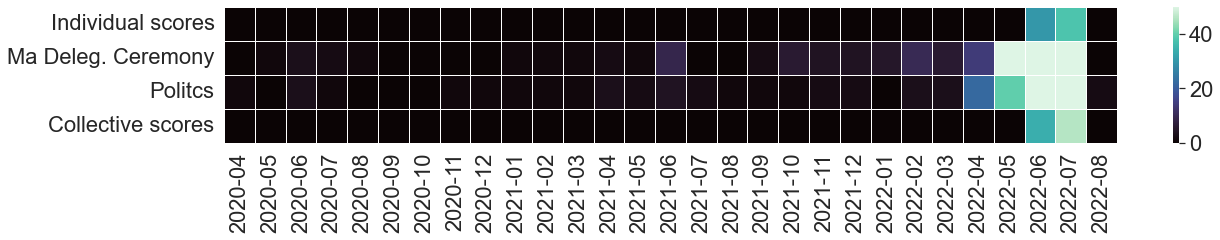

In [110]:
xticks = ['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08']
yticks = ['Individual scores', 'Ma Deleg. Ceremony', 'Politcs', 'Collective scores']
plt.figure(figsize=(20, 2.5))
df_heat_two
sns.set(font_scale=2)
sns.heatmap(df_heat_two.T, vmin=0, vmax=50, linewidths=.9,
            xticklabels=xticks, yticklabels=yticks, cmap='mako',
           )

In [93]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

### Analyse du nuage de mots des clusters :

Bien qu'à ce stade nous sachions à quoi se réfère chaque cluster, nous aimerions connaître plus en détail les thèmes qui reviennent dans les clusters. Dans des circonstances normales, nous passerions en revue chaque tweet et étiquetterions les thèmes manuellement. Mais dans le cas des big data, cela serait très coûteux. Même si, dans notre cas, nous n'avons que 2475 tweets, cela reste un grand nombre à parcourir manuellement. 

Nous utilisons donc l'analyse par *nuage de mots*. Le nuage de mots est un graphique qui affiche les mots ou les combinaisons de mots les plus fréquents présents dans un corpus (groupe de documents textuels, dans ce cas chaque tweet est considéré comme un document, et chaque cluster a son propre corpus).

La génération d'un nuage de mots devrait donner une idée des sujets évoqués par les utilisateurs et les membres de la communauté en rapport avec les jeux olympiques et le Comité Olympique Algérien.

Dans ce cas, nous avons utilisé l'ensemble de données original et nous avons regroupé nos données par cluster.

In [5]:
clstr_grp = df.groupby('cluster')

In [15]:
indiv_scores_clstr = clstr_grp.get_group(0)
politics_clstr = clstr_grp.get_group(1)
morocco_opn_ceremony_clstr = clstr_grp.get_group(2)
collect_scores = clstr_grp.get_group(3)

Les nuages de mots sont basés sur la fréquence des mots, les mots d'arrêt comme (le, ça, et, etc.) sont les plus importants dans n'importe quelle langue, donc nous devons les supprimer. Pour ce faire, nous avons utilisé un module contenant tous les mots vides de la langue française (voir ligne 1 du bloc de code ci-dessous), nous avons également ajouté certains des mots explétifs que le module initial n'incluait pas (voir ligne 2 du bloc de code ci-dessous).

Un autre problème concernant la génération de nuages de mots est que chaque mot a de nombreuses variations, par exemple, `sport, sports, sportif` ou `joueur, jouer, joue, jouable, jeu` ; il est donc nécessaire de traiter les documents relatifs à chaque corpus. Ce traitement consiste généralement en une *tokénisation* et une *lemmatisation*. Comme nous avons accompli cette étape plus tôt, voici un rappel rapide de ce en quoi consistent ces étapes :
*Tokénisation : c'est le processus qui consiste à diviser un document texte en une liste de mots où l'ordre du mot n'a normalement pas d'importance, en pratique par exemple *je pratique le sport trois fois par semaine. * devient une liste de mots `['je', 'pratique', 'le', 'sport', 'trois', 'fois', 'par', 'semaine', '.']` ; l'étape suivante consiste à supprimer les mots d'arrêt qui ne contribuent pas au sens du document, ce qui donne `['pratique', 'sport', 'trois', 'fois', 'jour']`. Il faut également considérer que les mots d'arrêt à supprimer dépendent de ce que le praticien cherche à comprendre. Dans des cas plus extrêmes de tokénisation, d'autres mots seront supprimés comme "fois" ou les verbes auxiliaires "être" et "avoir".
* Lemmatisation : cette étape vient typiquement après l'étape de tokénisation, principalement pour des raisons d'optimisation, considérant qu'un document a moins de mots après avoir été tokénisé, donc moins de temps sera consacré à la phase de lemmatisation. Dans cette phase, tous les mots sont réduits à leur racine afin d'unifier la vérification du même mot sous un seul mot : `sport & sportif` deviennent `sport` ; `joueur, jouer, jouable & jeu` deviennent `jeu`, etc.

In [53]:
stopw = set(stopwords.words('french'))
added = {'co', 't', 'https', 't', 'avoir', 'et', 'faire', 'merci', 'mediterraneen', 'jeu',
        "tout", "ete", "faible", "sport", "d'", "oran2022", "lors", "plus"}
stopw.update(added)


Nous avons créé une fonction pour générer des graphiques de nuages de mots à partir d'un cadre de données. Cette fonction fait maintenant partie du module `twittools`.

In [51]:
def gen_w_cloud(df, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopw,
        max_words=50,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(df.str.cat(sep=' '))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(titletle, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

    

Après avoir appliqué la fonction `gen_w_cloud()` à chacun des clusters nous obtenons les graphes ci-dessous. Pour rappel, voici à quoi correspond chaque cluster :
1. `cluster_0` : contient des documents (tweets) faisant référence à des compétitions sportives individuelles et à leurs scores.
2. `cluster_1` : contient des documents faisant référence à des thèmes politiques concernant les relations algéro-marocaines.
3. `cluster_3` : contient des documents faisant référence à la délégation marocaine ainsi qu'à la cérémonie d'ouverture.
4. `cluster_3` : contient des documents faisant référence aux poules de tirage au sort (groupes de compétition) pour les sports collectifs et leurs scores.

Dans les résultats ci-dessous, voici les clusters par ordre :
1. Sports collectifs/scores & poules de tirage au sort ;
2. La scène politique algéro-marocaine ;
3. La réception de la délégation marocaine et la cérémonie d'ouverture ; et
4. Les sports individuels et les scores.

Ces nuages de mots ne sont pas censés offrir un aperçu supplémentaire. Ils peuvent s'avérer utiles si, après l'analyse des clusters, le praticien/chercheur n'a pas une compréhension complète des thèmes présents dans chaque cluster. Dans le `#oran2022`, les clusters se sont avérés assez compréhensibles par eux-mêmes, cependant, ces nuages de mots aident à offrir plus de clarifications ou plus concrètement, ils confirment l'hypothèse préalable des thèmes que nous avons supposés être abordés dans chaque cluster. Par exemple :
- En considérant le premier nuage qui fait apriori référence aux *sports collectifs*, nous avons la confirmation entendue que la plupart des sports mentionnés sont des sports d'équipe, ainsi que le mot `poule` comme dans `poule A, poule B` faisant référence à des groupes d'équipes en compétition les uns avec les autres. Nous pouvons également voir que ce corpus contient un certain nombre de tweets donnant les dates et heures exactes des compétitions.
- En ce qui concerne le deuxième nuage de mots, nous pouvons confirmer que notre hypothèse préalable étiquetant ce cluster `politique` était correcte, car nous pouvons voir que les tweets contiennent des mentions du `Sahara occidental`, `vaccination trop` faisant référence au vaccin covid et probablement aux mesures de sécurité de santé, etc.
- Le troisième nuage de mots, a des mentions de la délégation marocaine, de la cérémonie d'ouverture, mais a également un nombre considérable de mots qui font référence à d'autres clusters, ce qui implique qu'il y a un niveau de chevauchement entre ce cluster et les autres clusters. On peut relancer l'analyse de cluster en acceptant seulement trois clusters au lieu de quatre, ou peut-être lancer une analyse de cluster sur ce cluster exact pour voir si des groupes homogènes émergent de celui-ci.
- Enfin, dans le dernier nuage de mots, nous pouvons voir des mots qui font référence à des sports individuels comme la boxe, le karaté, la natation, etc. ainsi que *femme/féminin* ou *homme*, ce qui confirme notre hypothèse préalable et nous amène à qualifier ce groupe de "sports individuels / scores".

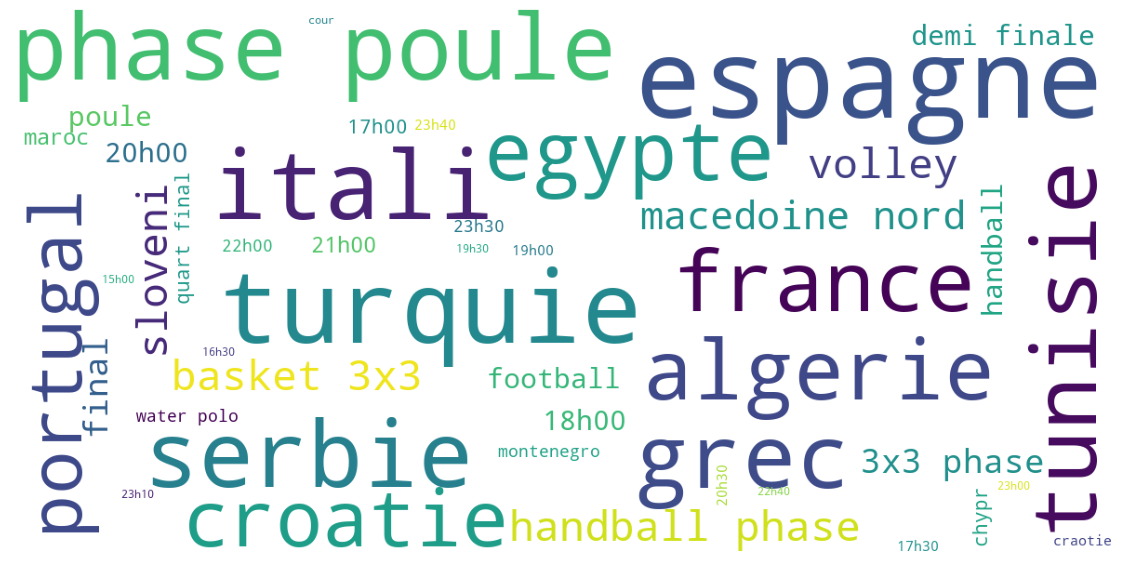

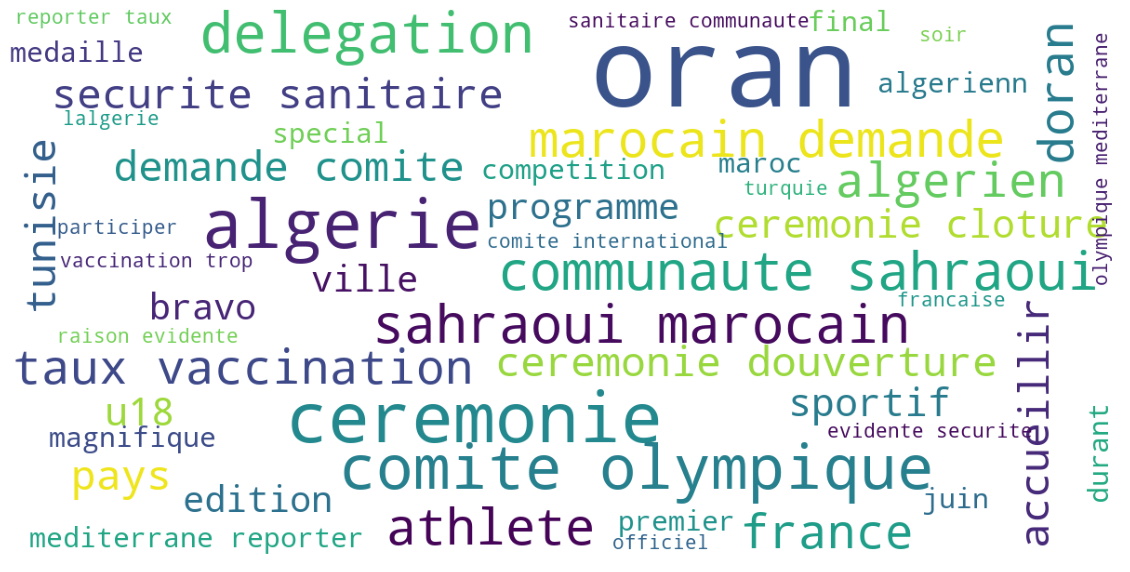

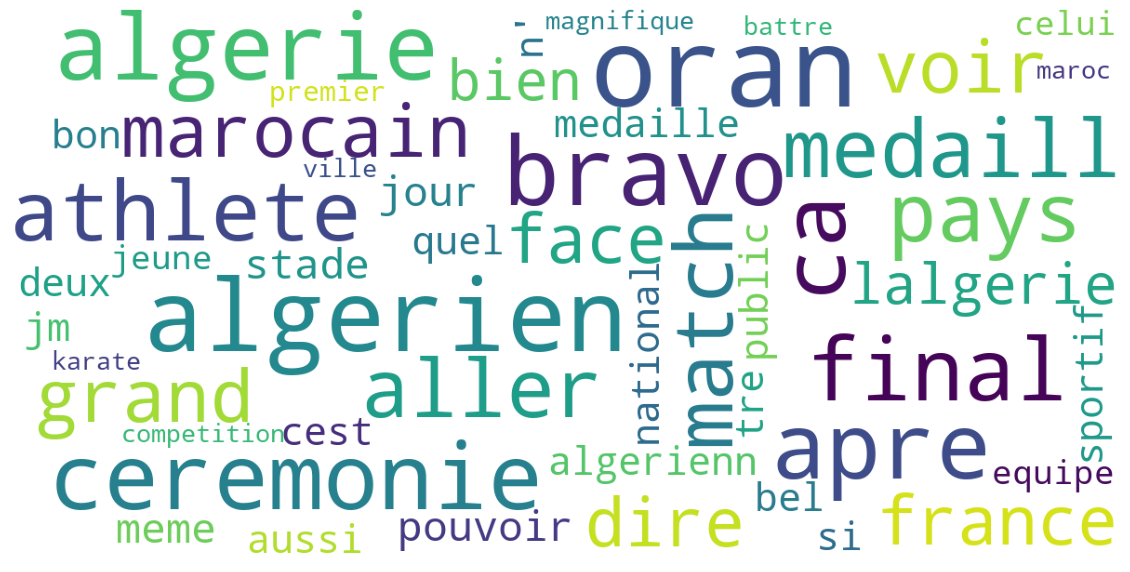

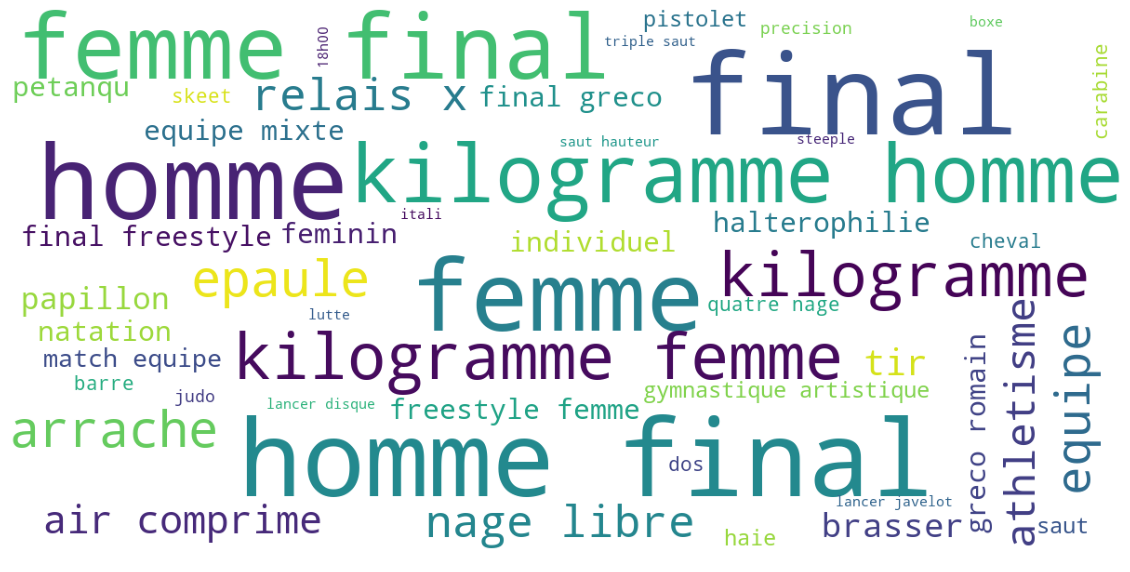

In [55]:
gen_w_cloud(collect_scores['c_bag_of_words'].dropna())
gen_w_cloud(politics_clstr['c_bag_of_words'].dropna())
gen_w_cloud(morocco_opn_ceremony_clstr['c_bag_of_words'].dropna())
gen_w_cloud(indiv_scores_clstr['c_bag_of_words'].dropna())

### Une analyse de réseau selon la théorie des graphes :
Les analyses de réseaux sont très utiles pour modéliser les relations entre les variables/individus ou toute entité faisant partie d'un tout. 

L'analyse des réseaux sociaux est le processus d'investigation des structures sociales par l'utilisation des réseaux et de la théorie des graphes. L'analyse ci-dessous présente les praticiens et les chercheurs en relations publiques en plongeant dans le code Python avec NetworkX pour construire et étudier les clusters sociaux à partir de nos données collectées précédemment.

**Les nœuds** représentent généralement les entités du réseau et peuvent posséder des propriétés propres (telles que le poids, la taille, la position et tout autre attribut) et des propriétés basées sur le réseau (telles que le degré - le nombre de voisins ou le cluster - un composant connecté auquel le nœud appartient, etc.)

**Les bords** représentent les connexions entre les noeuds et peuvent également contenir des propriétés (telles que le poids représentant la force de la connexion, la direction en cas de relation asymétrique ou le temps, le cas échéant).

##### Mesures de centralité
Les nœuds hautement centraux jouent un rôle clé dans un réseau, en servant de plaques tournantes pour différentes dynamiques de réseau. Cependant, la définition et l'importance de la centralité peuvent varier d'un cas à l'autre, et peuvent faire référence à différentes mesures de centralité :

**Degree** - le nombre de voisins du nœud.

**EigenVector** / vecteur propre - cercles itératifs de voisins. Un score élevé de vecteur propre signifie qu'un nœud est connecté à de nombreux nœuds qui ont eux-mêmes des scores élevés.

**Proximité** - le niveau de proximité de tous les nœuds.

**Betweenness** - le nombre de chemins courts passant par le noeud.

![texte alt](network_example.png "Exemple de réseau")
Illustration de diverses mesures de centralité. Source - Arroyo, D.. "Discovering Sets of Key Players in Social Networks". Computational Social Network Analysis (2010)

Avec cette brève introduction, nous cherchons à avoir un aperçu de la forme du réseau (s'il y en a un) des tweets contenant le hashtag `#oran2022`. D'un point de vue pratique, cela devrait aider les praticiens à comprendre l'écho des messages partagés par les utilisateurs des réseaux sociaux, ainsi que la dynamique qui a lieu entre ces utilisateurs (nœuds) qui sont représentés par une ligne (bord) qui souligne l'existence d'une relation.

Dans notre exemple, nous définissons la relation comme une gamme d'interactions, c'est-à-dire liker un tweet, répondre à un tweet, retweeter ou citer un tweet. Par conséquent, toute ligne entre les nœuds fait référence à au moins une de ces interactions. Les lignes circulaires partant du même nœud et y menant impliquent qu'un utilisateur (nœud) a interagi avec son propre contenu. 

In [2]:
df = twittools.pd_open_csv('oran_22_populated.csv', index_col='Unnamed: 0')
df['day_day'] = pd.to_datetime(df['day_day'], format="%Y-%m-%d")
df

username                                            content  \
0      liverpooldzz   flash - lors de la ceremonie des jeux mediter...   
1       APS_Algerie  championnat arabe de " " (3e journee) : deux m...   
2     soir_officiel  championnat arabe de natation : lalgerie decro...   
3     hakimmkireche  tout ce travail magique au final une etat qui ...   
4          SyfaxArk  le recap de trip in est juste magnifique  http...   
...             ...                                                ...   
2470       COJM2022  travaux de la 9eme reunion en teletravail entr...   
2471   cijmmedgames  43 sites sportifs aux jeux mediterraneens dora...   
2472       COJM2022  reunion en teletravail presidee par le directe...   
2473   cijmmedgames  nouveau stade doran : le premier ministre d al...   
2474   cijmmedgames  addadi: ce report permettra a lensemble du mou...   

                                         c_bag_of_words  \
0     flash lors ceremonie jeu mediterraneen public ...   
1     championnat arabe ( journee deux medaille dor ...   
2     championnat arabe natation lalgerie decroche t...   
3     travail magique final etat pousse arriere merc...   
4     recap trip in juste magnifique https://t.co/nm...   
...                                                 ...   
2470  travail 9em reunion teletravail entre commissi...   
2471  43 site sportif jeu mediterraneen doran https:...   
2472  reunion teletravail presidee directeur general...   
2473  nouveau stade doran premier ministre algerie a...   
2474  addadi report permettre avoir lensemble mouvem...   

                           date             tweet_id  \
0     2022-08-17 22:21:51+00:00  1560029164165636101   
1     2022-07-23 10:01:26+00:00  1550783138003140609   
2     2022-07-21 12:53:17+00:00  1550101607119036416   
3     2022-07-19 15:32:57+00:00  1549417012635619331   
4     2022-07-18 21:41:12+00:00  1549147299800129536   
...                         ...                  ...   
2470  2020-06-11 14:29:49+00:00  1271087244024127488   
2471  2020-06-10 16:24:57+00:00  1270753830846836737   
2472  2020-06-04 23:08:58+00:00  1268681179680604162   
2473  2020-05-20 12:52:37+00:00  1263090249468653568   
2474  2020-04-01 16:35:01+00:00  1245389215208222720   

                                               outlinks  n_links  \
0                                                   NaN        0   
1     https://www.aps.dz/sport/143124-championnat-ar...        1   
2        https://www.lesoirdalgerie.com/s@c6zam9fr85494        1   
3                                                   NaN        0   
4                                                   NaN        0   
...                                                 ...      ...   
2470                                                NaN        0   
2471  https://cijm.org.gr/43-sites-sportifs-aux-jeux...        1   
2472                                                NaN        0   
2473  https://cijm.org.gr/nouveau-stade-doran-le-pre...        1   
2474  https://cijm.org.gr/addadi-ce-report-permettra...        1   

                                                    url  n_likes  n_quotes  \
0     https://twitter.com/liverpooldzz/status/156002...        0         0   
1     https://twitter.com/APS_Algerie/status/1550783...       27         0   
2     https://twitter.com/soir_officiel/status/15501...        0         0   
3     https://twitter.com/hakimmkireche/status/15494...        1         0   
4     https://twitter.com/SyfaxArk/status/1549147299...        0         0   
...                                                 ...      ...       ...   
2470  https://twitter.com/COJM2022/status/1271087244...        3         0   
2471  https://twitter.com/cijmmedgames/status/127075...        7         0   
2472  https://twitter.com/COJM2022/status/1268681179...        2         0   
2473  https://twitter.com/cijmmedgames/status/126309...        8         0   
2474  https://twitter.com/cijmmedgames/status/124538...        3 

Tout d'abord, nous devons créer un dataframe (tableau) qui contient uniquement les données dont nous avons besoin. Les données dont nous avons besoin dans ce cas sont une liste complète des utilisateurs qui ont tweeté avec le hashtag `#oran2022`, ceci est déjà disponible dans la base de données originale. Cependant, rien n'empêche les utilisateurs de partager des tweets contenant le hashtag plus d'un. Nous devons donc créer une table qui contienne tous les utilisateurs sans redondance. En respectant la convention de la théorie des graphes, nous nommerons cette colonne `nodes`.

Des données supplémentaires sont nécessaires pour pouvoir modéliser le graphe du réseau. Il s'agit des utilisateurs qui ont interagi avec les utilisateurs du hashtag. Par conséquent, le tableau doit contenir une colonne pour chaque utilisateur qui a partagé le hashtag dans une colonne et une liste d'utilisateurs, nous nommerons cette colonne `edges` ; une troisième colonne, facultative, reflète le degré du noeud, c'est-à-dire le nombre de noeuds `interacteurs` connectés à cette affiche `nodes` que nous nommerons `size`.

Afin d'obtenir toutes les données nécessaires, nous avons créé une boucle `for` qui crée un dictionnaire vide contenant une entrée pour chaque utilisateur. Chaque entrée contient une liste vide de `edges` qui sera remplie avec les noms des utilisateurs qui ont interagi avec le tweet du poster ainsi que le nombre de ces utilisateurs qui est initialement fixé à zéro `0`.

Après avoir exécuté cette boucle, la sortie est imprimée sous le bloc de code, comme le lecteur peut le voir, elle est toujours vide et ne contient que le nom du poster.

In [1]:
# creating a dictionary containing all posters
# empty list of interactors
# and zero size of node
master_dict = {}
for poster in df_network.iterrows():
    sub_dict = {}
    poster = poster[1]
    sub_dict.update({
        'poster':poster['nodes'],
        'interactors':[],
        'size':0,
    })
    master_dict.update({poster['nodes']:sub_dict})
pprint.pprint(master_dict)


{'1000Tonne': {'interactors': [], 'poster': '1000Tonne', 'size': 0},
 '1creedclear': {'interactors': [], 'poster': '1creedclear', 'size': 0},
 ...
  'zsalmi': {'interactors': [], 'poster': 'zsalmi', 'size': 0},
 'zsidane': {'interactors': [], 'poster': 'zsidane', 'size': 0}}



Ici nous essayons d'accéder à une entrée pour voir ce qu'elle contient, nous avons utilisé un nom d'utilisateur d'un compte qui apparemment est marocain `EmpireMaroc`. Comme nous pouvons le voir la liste `interactors` est vide, et le nombre d'interactors `size` est zéro.

In [5]:
master_dict['EmpireMaroc']

{'poster': 'EmpireMaroc', 'interactors': [], 'size': 0}

Maintenant, il est temps de remplir ce dictionnaire que nous allons ensuite convertir en un `dataframe`.

Tout d'abord, nous collectons les noms d'utilisateurs de l'ensemble de données original dans la colonne `username`, cette colonne supporte la redondance, ce qui signifie que si un compte affiche plus d'un tweet avec le hashtag, il sera présent plus d'une fois. Nous convertissons ensuite cette liste en un `set`. Un `set` est une structure de données comme les listes mais ne supporte pas la redondance, donc si un nom d'utilisateur est répété, il ne sera mentionné qu'une seule fois.
Dans les lignes 3 et 4 du bloc de code, nous créons les colonnes `edges` et `node_size` respectivement.

Voir le résultat ci-dessous. 

In [3]:
df_network = pd.DataFrame(set(df['username'].values))
df_network = df_network.rename(columns={0:'nodes'})
df_network['edges'] = np.nan
df_network['node_size'] = 0
df_network

nodes  edges  node_size
0        EmpireMaroc    NaN          0
1        BreikaBeiba    NaN          0
2     DestinationALG    NaN          0
3    AbdellahBOUDOUR    NaN          0
4    EsperanceSTunis    NaN          0
..               ...    ...        ...
665  Marocain2france    NaN          0
666        abekhechi    NaN          0
667        RiadhThe9    NaN          0
668  boucetta_habbib    NaN          0
669  BouchachiaAmeur    NaN          0

[670 rows x 3 columns]

Un autre problème est apparu lorsque nous avons essayé d'extraire les interacteurs de l'ensemble de données original, car ils étaient initialement stockés comme des objets `list` mais lorsque nous avons essayé d'obtenir les éléments de la liste, ils ont été traités comme une chaîne de caractères au lieu de `list`. Pour résoudre ce problème, nous avons créé une fonction qui analyse les listes sous la forme de chaînes de caractères et renvoie un objet `dictionary` rempli. 

D'après la sortie, le dictionnaire a été rempli avec 670 entrées uniques, c'est-à-dire des affiches uniques et leurs interacteurs en plus de la taille absolue du nœud qui est le nombre d'interactions enregistrées pour une affiche donnée.

In [6]:
pattern = "\'username\': \'([a-zA-Z0-9]+)\'"
# This function takes a dataframe, an empty dict with poster entries and returns the interactors 
# with these posters

def interactors_parser(dataframe, pattern, master_dict):
    updated_master_dict = copy.deepcopy(master_dict)
    for r in dataframe.iterrows():
        interactors = []
        poster = r[1]['username']
#         print(f"poster: {poster}")
        if r[1]['quoted'] > 0:
            rslt = re.findall(pattern, r[1]['tweet_quotes'], re.I)
            if rslt:    
                interactors.extend(rslt)
#                 print(f"****interactors after quoted: {interactors}")
        if r[1]['liked'] > 0:
            rslt = re.findall(pattern, r[1]['tweet_likers'], re.I)
            if rslt:
                interactors.extend(rslt)
#                 print(f"****interactors after liked: {interactors}")
        if interactors:
            # c_e contains values only for current iteration
            c_e = {'node': poster, 'edges': interactors, 'size': len(interactors)}
            # indiv dict contains previous values
            indiv_dict = updated_master_dict[poster]
            # updating indiv dict to contain the most recent values
#             print(indiv_dict)
#             print(f"indiv_dict(interactors): {indiv_dict['interactors']}")
#             print(f"c_e(edges): {c_e['edges']}")
            for x in c_e['edges']:
                indiv_dict['interactors'].append(x)
#             indiv_dict['interactors'].append(x for x in c_e['edges'])
            indiv_dict['interactors'] = list(tuple(indiv_dict['interactors']))
#             print(f"indiv_dict(interactors): {(indiv_dict['interactors'])}")
            indiv_dict['size'] = indiv_dict['size'] + c_e['size']
            updated_master_dict.update({poster: indiv_dict})
#             print(f"indiv_dict['size']: {indiv_dict['size']}")
    return updated_master_dict
        
nodes_and_edges = interactors_parser(df, "\'username\': \'([a-zA-Z0-9]+)\'", master_dict)
print('-----------')
pprint.pprint(len(nodes_and_edges.keys()))

-----------
670


L'étape suivante consiste à migrer les données contenues dans le dictionnaire vers le `dataframe` ou la table qui contient les trois colonnes : `nodes`, `edges` et `node_size`. Ces données sont déjà disponibles, il suffit donc de faire des itérations sur les entrées de l'objet `dictionary` et de remplacer 

In [97]:
for pair in nodes_and_edges:
    node = pair['node']
#     edges = pair['edges']
    edges = pd.Series((v[0] for v in pair['edges']))
    if pd.isna(df_network.loc[node,'edges']):
        df_network.loc[node]['edges'] = edges
    else:
#         print(type(df_network.loc[df_network['nodes'] == node]['edges'])) 
#         print(df_network.loc[df_network['nodes'] == node]['edges'])
        x = df_network.loc[node, 'edges'].append(edges)
        df_network.loc[node,'edges'] = x
df_network
    

edges
nodes                 
mohammedi_samia    NaN
Dzpower___         NaN
vbka_              NaN
felondz90          NaN
behli_hadjer       NaN
...                ...
APS_Algerie        NaN
Badreddine_had     NaN
ChaLembach         NaN
MoroccoPowerof     NaN
BessolNazim        NaN

[670 rows x 1 columns]

In [8]:
df_network['edges'] = df_network['edges'].astype('object')
df_network.dtypes

nodes        object
edges        object
node_size     int64
dtype: object

Ci-dessous, vous trouverez le `dataframe` (tableau) rempli avec les données du `dictionary`.

In [9]:
for r in df_network.iterrows():
    index = r[0]


    poster = r[1]['nodes']
#     print(index)
#     print(poster)
#     print(df.at[index, 'edges'])
#     print(nodes_and_edges[poster]['interactors'])
#     print(nodes_and_edges[poster]['size'])
    df_network.at[index, 'edges'] = nodes_and_edges[poster]['interactors']
    df_network.at[index, 'node_size'] = nodes_and_edges[poster]['size']
    
df_network

nodes                                              edges  \
0        EmpireMaroc  [Henrique5998, AdilAdi06894792, amgharbxl, jab...   
1        BreikaBeiba  [Drobble1, miloud60, KahenaB213, Ramdane2U, Ho...   
2     DestinationALG  [FadilaBouchoua3, AmelBelhadj34, Hafsarahmani1...   
3    AbdellahBOUDOUR                                                 []   
4    EsperanceSTunis  [HJZ89075900, afif87891147, KingYaseen29, hass...   
..               ...                                                ...   
665  Marocain2france                                                 []   
666        abekhechi                                                 []   
667        RiadhThe9  [Benstiti6, Yxss19, samynina, zouzou96086485, ...   
668  boucetta_habbib                                                 []   
669  BouchachiaAmeur                                                 []   

     node_size  
0           41  
1          134  
2           21  
3            0  
4            8  
..         ...  
665          0  
666          0  
667         15  
668          0  
669          0  

[670 rows x 3 columns]

Maintenant que nous avons un `dataframe` propre contenant toutes les données requises pour générer un graphe de réseau, nous commençons à ajouter les bords. Comme nous l'avons vu précédemment, un bord est la ligne qui décrit l'existence d'une relation entre deux noeuds. Afin de générer le graphe, nous avons besoin du module `networkx` qui possède l'objet `Graph()`. Nous passons nos arêtes à cet objet sous la forme de paires de noeuds, par exemple, si nous avons deux noeuds (`A` et `B`) et que nous voulons dessiner un lien entre eux, nous passons une paire sous la forme `(A, B)` qui indique à l'objet `Graph()` qu'il y a deux noeuds et qu'ils sont liés. 

Nous avons d'abord effectué un test de génération de graphe, qui a abouti à un graphe très encombré du fait que nos données contiennent plus de dix mille 10.000 interactions. Nous avons donc limité le nombre d'interactions à 5 interactions seulement par nœud pour des raisons de lisibilité.

Le lecteur est libre d'augmenter cette limite à sa préférence, la variable d'intérêt est `max_edges` dans la ligne 7 du bloc de code ci-dessous.

In [35]:
grph = nx.Graph()
for r in df_network.iterrows():
    max_edges = 0
    for interactor_ in r[1]['edges']:
        grph.add_edge(r[1]['nodes'], interactor_)
        max_edges += 1
        if max_edges >= 5:
            break



De même, pendant notre phase de test, nous avons remarqué qu'il était difficile de différencier les deux types de noeuds, ceux qui ont utilisé le hashtag `#oran2022` et ceux qui ont interagi avec lui. Par conséquent, nous avons fait le codeblock ci-dessous, pour colorer les posters en `rouge` et les interactants en `vert`.

Le graphique ci-dessous n'est pas très lisible. Un graphique en plus grand format devrait être disponible dans la section *Annexe* ou un lien sera fourni ultérieurement.

Le graphique généré fournit de multiples informations sur la structure des messages et des communautés autour du hashtag `oran2022`. Tout d'abord, les nœuds du milieu sont ceux qui ont le plus d'interactions enregistrées et ces nœuds semblent avoir de nombreux membres de leur communauté qui interagissent avec d'autres posters.
Deuxièmement, en lisant les noms d'utilisateur, nous pouvons voir que les nœuds qui ont reçu le plus d'interactions sont pour la plupart des comptes personnels ou d'influenceurs algériens, alors que l'on s'attendait à ce que le Comité olympique algérien soit parmi eux, et encore moins les médias traditionnels qui semblent être presque totalement absents, à l'exception de `APS_Algerie` et `TheAlgiersPost` qui sont à la limite de la communauté centrale.

Un autre résultat intéressant est qu'au centre, nous pouvons également voir quelques comptes marocains et tunisiens dont les interactants interagissent également avec des comptes algériens, ce qui implique que les deux communautés ne sont pas isolées et que, par conséquent, l'information circule dans les deux sens. 

Contrairement aux comptes marocains, d'autres comptes d'autres nationalités comme les comptes français, par exemple, `FranceJudo_` egyptiens, et italiens sont sur le cercle extérieur du graphique où ils ont leurs propres interacteurs qui n'interagissent pas avec les tweets des affiches algériennes, tunisiennes et marocaines. 

In [36]:
colors = []
for node in grph:
    if node in df_network['nodes'].values:
        colors.append('red')
    else:
        colors.append("green")

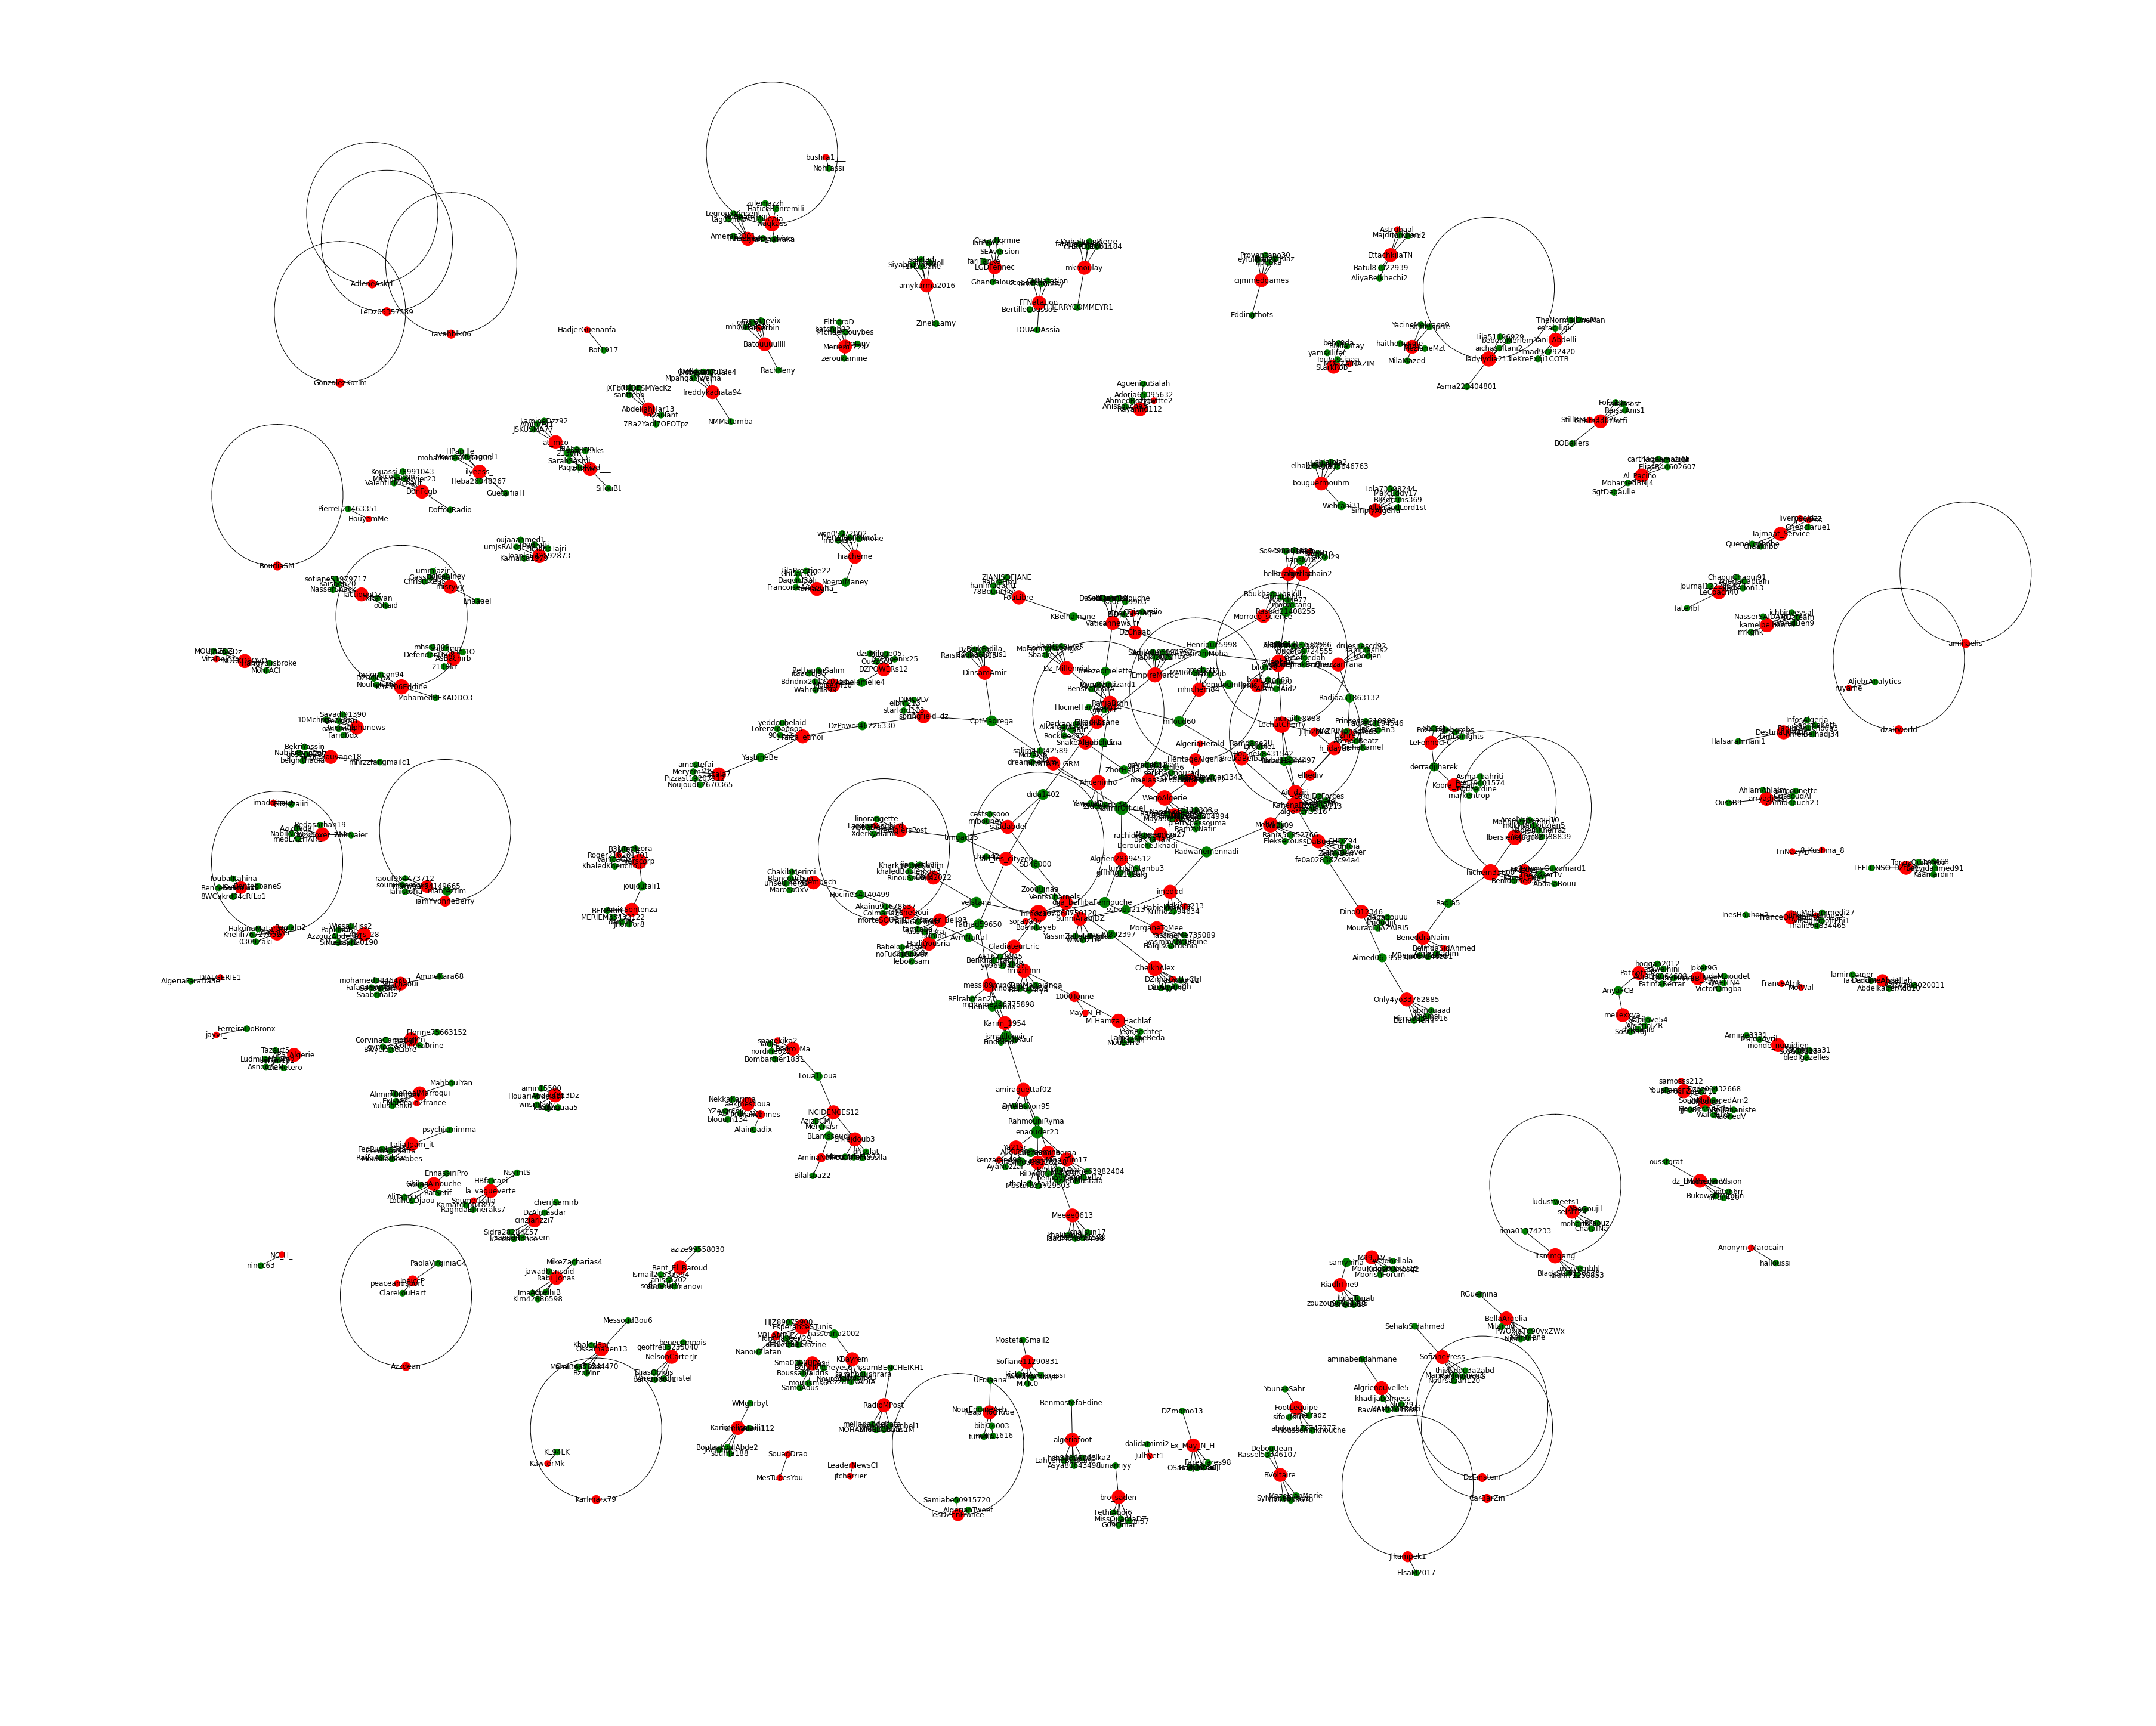

In [37]:

plt.figure(figsize=(50, 40))
nx.draw(grph, with_labels=True,
        node_color=colors,
       node_size=[v * 100 for v in dict(grph.degree()).values()])

In [11]:
twittools.save_to_csv(df_network, 'network_data.csv')
twittools.save_to_excel(df_network, 'network_data.xlsx')

Saved successfully.
Saveconvert_to_datetimed successfully.


In [69]:
df_network = twittools.pd_open_csv('network_data.csv', index_col='Unnamed: 0')
df_network

nodes                                              edges  \
0        EmpireMaroc  ['Henrique5998', 'AdilAdi06894792', 'amgharbxl...   
1        BreikaBeiba  ['Drobble1', 'miloud60', 'KahenaB213', 'Ramdan...   
2     DestinationALG  ['FadilaBouchoua3', 'AmelBelhadj34', 'Hafsarah...   
3    AbdellahBOUDOUR                                                 []   
4    EsperanceSTunis  ['HJZ89075900', 'afif87891147', 'KingYaseen29'...   
..               ...                                                ...   
665  Marocain2france                                                 []   
666        abekhechi                                                 []   
667        RiadhThe9  ['Benstiti6', 'Yxss19', 'samynina', 'zouzou960...   
668  boucetta_habbib                                                 []   
669  BouchachiaAmeur                                                 []   

     node_size  
0           41  
1          134  
2           21  
3            0  
4            8  
..         ...  
665          0  
666          0  
667         15  
668          0  
669          0  

[670 rows x 3 columns]

Ayant vu à quel point le graphe du réseau est encore encombré, nous allons maintenant générer un graphe qui ne contient des étiquettes que pour les trente comptes les plus influents `top_x` variable ligne 4. Toutes les autres choses étant égales, sauf que les comptes les plus influents auront un plafond de 15 arêtes/relations au lieu de 5, alors que le reste des noeuds est toujours limité à 5 arêtes.

In [70]:
grph = nx.Graph()
df2 = df_network.sort_values('node_size', ascending=False)
top_accounts = list(df2['nodes'].values)
top_x = top_accounts[:30]
# for r in df_network.iterrows():
#     max_edges = 0
#     for interactor_ in r[1]['edges']:
#         grph.add_edge(r[1]['nodes'], interactor_)
#         max_edges += 1
#         if max_edges >= 15:
#             break
for r in df_network.iterrows():
    max_edges = 0

    edges = r[1]['edges']
    if edges != '[]':
        edges = edges.strip('][').split("', '")
    else:
        edges = []
    nodes = r[1]['nodes']
    max_relationships = 15 if nodes in top_x else 5
    for interactor_ in edges:
        max_edges += 1
        grph.add_edge(nodes, interactor_)
        if max_edges > max_relationships:
            break

In [71]:
colors = []
for node in grph:
    if node in df_network['nodes'].values:
        colors.append('red')
    else:
        colors.append("green")

In [72]:

labels = {}    
for node in grph.nodes():
    if node in top_x:
        #set the node name as the key and the label as its value 
        labels[node] = node
#set the argument 'with labels' to False so you have unlabeled graph
# nx.draw(G, with_labels=False)
#Now only add labels to the nodes you require (the hubs in my case)
# nx.draw_networkx_labels(G,pos,labels,font_size=16,font_color='r')

Dans le graphique ci-dessous, nous avons généré un réseau mettant en évidence les 30 comptes les plus influents qui ont partagé le hashtag `#oran2022` ainsi que 15 des comptes qui ont interagi avec ces 30 premiers influenceurs. Nous n'avons étiqueté que les 30 premiers comptes influents pour améliorer la lisibilité, nous avons essayé d'étiqueter chaque nœud et le graphique est devenu surchargé de texte et illisible. Nous avons également mis une valeur maximale de 15 pour illustrer seulement 15 relations avec ces 30 premiers comptes tandis que le reste des comptes qui ont partagé le hashtag ont été limités à 5 nœuds d'interaction.

Comme on peut le voir dans le graphe du réseau, la plupart des 30 premiers comptes influents (voir le tableau ci-dessous) sont des comptes algériens (d'après le nom d'utilisateur). De plus, ces comptes semblent être liés entre eux jusqu'à un certain point, c'est-à-dire qu'ils ont de nombreux interacteurs (comptes qui ont aimé, retweeté ou cité des tweets du compte original). De plus, ces comptes influents sont eux-mêmes membres d'autres communautés d'influenceurs, comme le montrent les relations entre les nœuds rouges et rouges. 

Les deuxièmes comptes les plus présents selon le nom d'utilisateur, sont marocains et ils semblent être les seuls comptes d'une autre nationalité à interagir avec le contenu algérien. Cela ne devrait pas surprendre, compte tenu de la scène géopolitique actuelle entre les deux pays et de la manière dont la délégation marocaine a été accueillie à l'aéroport à son arrivée sur le territoire algérien. 

Enfin, sur la couche extérieure du graphique du réseau, il semble y avoir beaucoup de petites communautés qui sont isolées et n'ont aucun lien avec la diaspora algérienne ni avec d'autres communautés similaires. 

Les principales conclusions de ce graphique pour les praticiens du Comité Olympique Algérien sont les suivantes :
1. Il apparaît qu'à l'exception de `APS_Algérie`, aucun autre média officiel grand public n'est présent parmi les comptes les plus influents, ce qui réduit encore l'importance des médias externes d'information au profit des comptes indépendants.
2. Au lieu d'essayer d'attirer l'attention des médias traditionnels, le Comité Olympique Algérien pourrait établir une relation avec ces influenceurs pour avoir accès à leur audience, en particulier ceux qui communiquent exclusivement sur le sport et le sport algérien.
3. Même si le Comité Olympique Algérien choisit d'établir une relation avec un nombre limité de ces comptes influents, et compte tenu de la façon dont ils sont tous liés, tout message partagé a une chance considérable d'être repris par d'autres comptes qui n'ont aucune relation officielle les liant au Comité Olympique Algérien. Et enfin,
4. Au lieu de sélectionner au hasard des comptes parmi les 30 comptes les plus influents, le Comité Olympique Algérien devrait chercher à sélectionner les comptes qui ont le moins de membres d'audience en commun avec d'autres comptes pour maximiser leur portée, par exemple `TheAlgiersPost` et `mellexxya` car ils semblent partager la même audience ; le Comité Olympique Algérien devrait opter pour `TheAlgiersPost` et `Ex_May_N_H`.

{'Algrienouvelle5': Text(0.18530729413032532, -0.5133498907089233, 'Algrienouvelle5'),
 'TactiqueDz': Text(-0.05585337057709694, 0.20221281051635742, 'TactiqueDz'),
 'LGDFennec': Text(-0.07654281705617905, -0.2652827203273773, 'LGDFennec'),
 'mellexxya': Text(0.012972915545105934, 0.0017030381131917238, 'mellexxya'),
 'la_vagueverte': Text(0.05568723753094673, 0.2605305314064026, 'la_vagueverte'),
 'Tajmaat_Service': Text(0.03049645945429802, 0.8071578145027161, 'Tajmaat_Service'),
 'Mtala7': Text(0.13829606771469116, 0.02080181986093521, 'Mtala7'),
 'Kamel31001': Text(-0.05846529081463814, -0.039989572018384933, 'Kamel31001'),
 'IbersieneJugur2': Text(-0.0072167543694376945, 0.17944739758968353, 'IbersieneJugur2'),
 'spotgym_': Text(0.7058340907096863, 0.3999876379966736, 'spotgym_'),
 'Bent_El_Baroud': Text(0.003915098961442709, 0.06226494908332825, 'Bent_El_Baroud'),
 'INCIDENCES12': Text(-0.3042173981666565, -0.21438220143318176, 'INCIDENCES12'),
 'cijmmedgames': Text(0.12036880850

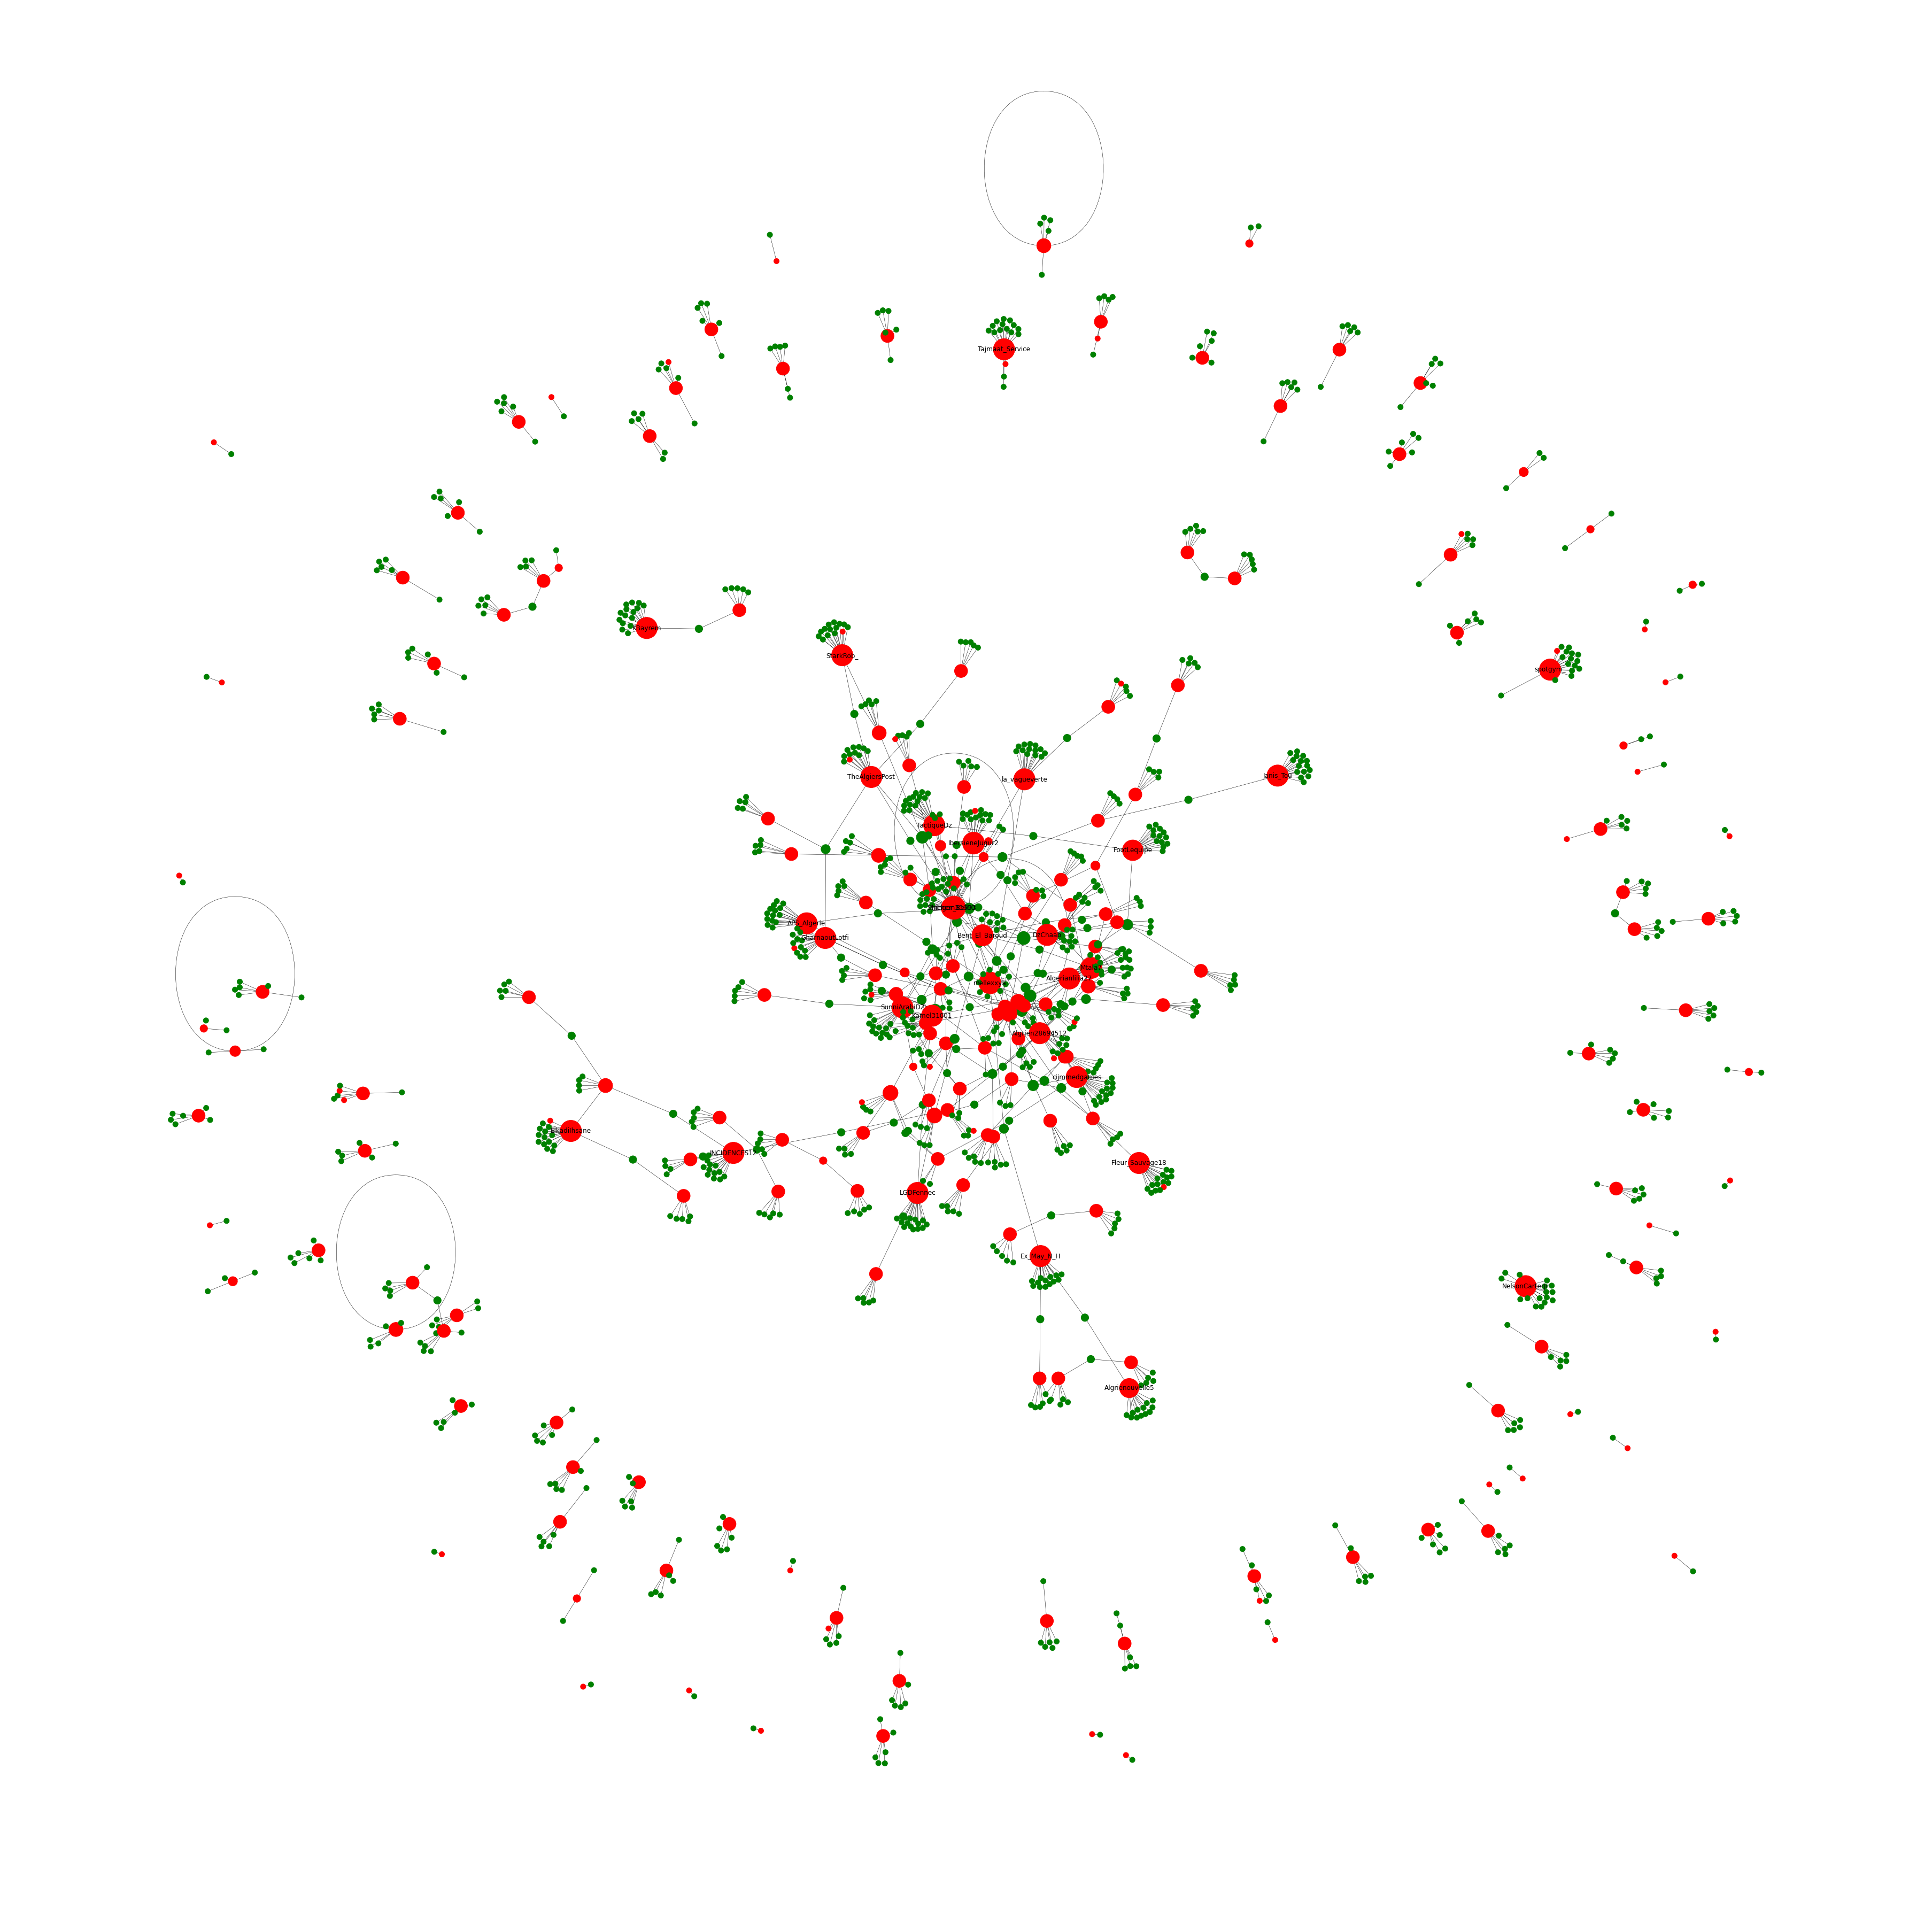

In [73]:
  
plt.figure(figsize=(50, 50))
pos = nx.spring_layout(grph)
nx.draw(grph, pos=pos,with_labels=False,
        node_color=colors,
       node_size=[v * 100 for v in dict(grph.degree()).values()], width=0.5)

nx.draw_networkx_labels(grph,pos,labels=labels)

Une liste des 30 comptes les plus influents en fonction du nombre d'interactions (likes, retweets, réponses et citations ; `node_size`).

In [62]:
df2[['nodes', 'node_size']].head(30)

nodes  node_size
392          DzChaab       2330
17         LGDFennec       1548
7    Algrienouvelle5       1326
369   TheAlgiersPost       1234
527       Kamel31001       1000
248  IbersieneJugur2        913
568       Ex_May_N_H        796
300      APS_Algerie        753
14        TactiqueDz        635
364     INCIDENCES12        627
287        mellexxya        556
279     cijmmedgames        409
531      FootLequipe        377
659  Algrien28694512        374
188           Mtala7        305
113    la_vagueverte        274
272   Bent_El_Baroud        227
452     SunniArabiDZ        208
385     ElkadiIhsane        195
548      hichem33600        190
139  Tajmaat_Service        184
664   GharnaoutLotfi        177
446   NelsonCarterJr        173
471  Algerianlilia27        172
643        StarkRob_        172
271         spotgym_        171
376          KBayrem        165
538  Stringer_Bell93        159
584        Janis_Tou        152
408  Fleur_Sauvage18        151